# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

In [101]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import calplot as cp
import folium as fl

In [ ]:
# using my favorite seaborn style
plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.family'] = 'helvetica'


## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

> Note: The combined dataset was created following the instructions from the [Jupyter Notebook](../files/Correctly_Merge_Data_v2.ipynb), which was provided by the TA's.

In [54]:
# load the combined dataset
df = pd.read_csv('../res/SF_combined_police_reportst_2003_to_present.csv')
df['FullDate'] = pd.to_datetime(df['FullDate']) 

In [55]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701423 entries, 0 to 1701422
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   FullDate    datetime64[ns]
 1   FullTime    object        
 2   Category    object        
 3   PdDistrict  object        
 4   Longitude   float64       
 5   Latitude    float64       
 6   TimeOfDay   int64         
 7   DayOfWeek   object        
 8   DayOfMonth  int64         
 9   Month       object        
 10  Year        int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 142.8+ MB


### Exercise 3: Temporal patterns.
* To start off easily, let's count the number of crimes per year:
    * What is the year with most crimes? 
    * What is the year with the fewest crimes?.
* Create a barplot of crimes-per-year (years on the $x$-axis, crime-counts on the $y$-axis).
* Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years ~~2003-2017~~ 2003 - present.

In [50]:
# --- Exercise 3: Most / fewest crime years
df_years = df.value_counts("Year")

print(f"Year with most crimes: {(df_years.idxmax())}. Count: {df_years.max()}")
print(f"Year with fewest crimes: {(df_years.idxmin())}. Count: {df_years.min()}")

Year with most crimes: 2017. Count: 90058
Year with fewest crimes: 2025. Count: 4067


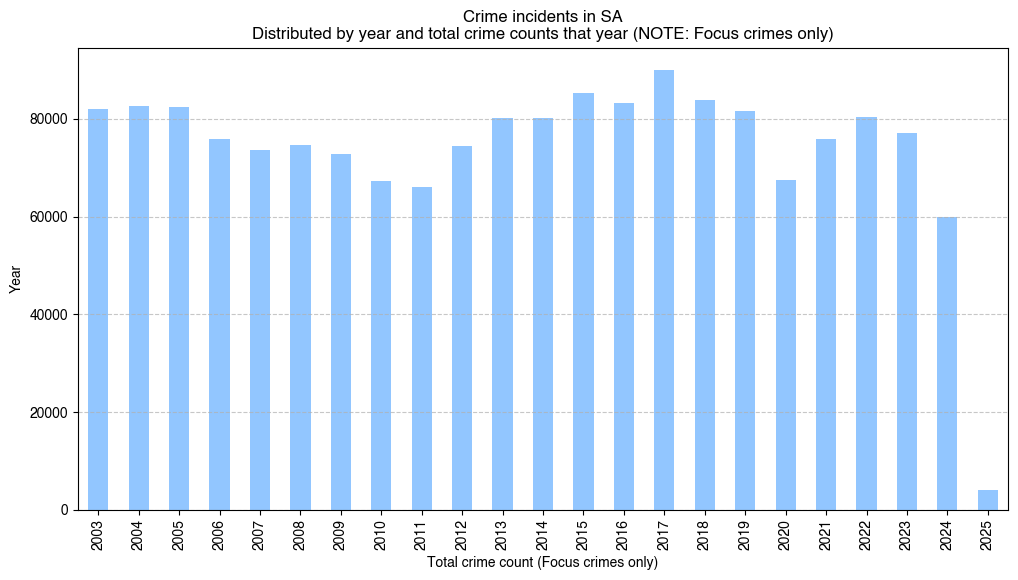

In [56]:
# --- Exercise 3: Yearly trends
df_years = df_years.sort_index()

plt.figure(figsize=(12, 6))
df_years.plot(kind="bar")

plt.title("Crime incidents in SA\nDistributed by year and total crime counts that year (NOTE: Focus crimes only)")
plt.xlabel("Total crime count (Focus crimes only)")
plt.ylabel("Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


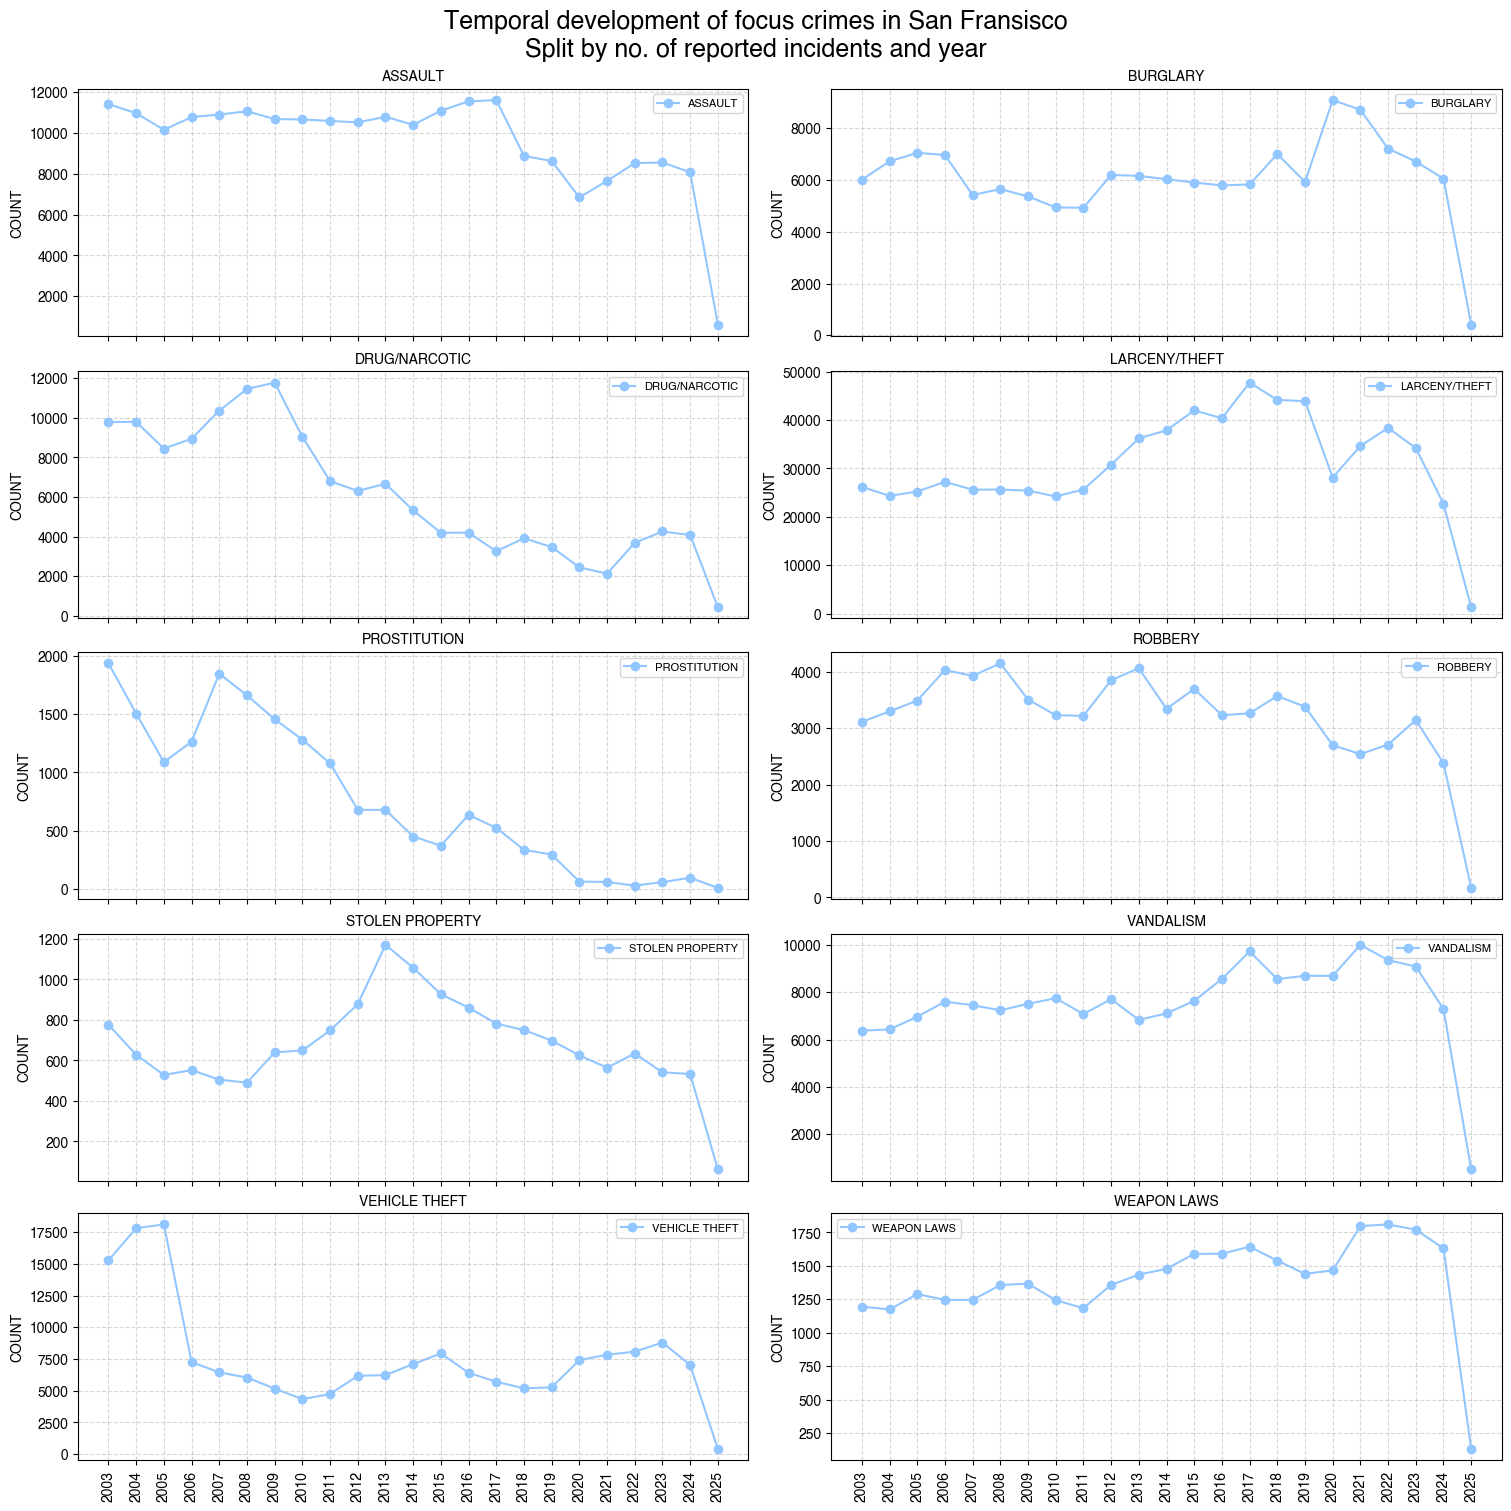

In [57]:
# --- Exercise 3: Focus Plots

# Group by year and category, then count occurrences
category_trends = df.groupby(["Year", "Category"]).size().unstack()

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15), sharex=True, constrained_layout=True)
axes = axes.flatten()

# Plot each crime category in a separate subplot
for i, category in enumerate(category_trends.columns):
    axes[i].plot(category_trends.index, category_trends[category], marker='o', label=category)
    axes[i].set_title(category, fontsize=10)
    axes[i].set_ylabel("COUNT")
    axes[i].set_xticks(np.arange(2003, 2026), np.arange(2003, 2026), rotation=90)
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].legend(fontsize=8)

# Show the plot
plt.suptitle("Temporal development of focus crimes in San Fransisco\nSplit by no. of reported incidents and year", fontsize=18)
plt.show()

## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")
* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.


### Answer: Questions for the lecture. 
 
- **What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?**

    - Metadata is in some way the "header" of the data; it is what describes the structure of the data. In the video example it might be "latitude", "longitute" or "time". It tells us that the data we are working with has some kind of structure, where each datapoint will probably contain a value in each of these metadata fields.
    - The data however is the *acutal data* that lies within each datapoint; it is the values of "latitude", "longitute" and "time", such as 100.454, 92.3 and 2010-12-21T17:31:19:000Z (a timestamp). The data can be NaN if it is not defined, as we have also seen in the SF dataset.

- **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult.**

    - Yes I partly agree with what he's saying. This is also how we are taught math when we are young; typically there are some calculations made based on images of i.e. apples or oranges, and it helps us grasp the idea of adding/substracting/multiplying elements, using visual representations.
    - When we are older, and when we've mastered these techniques, we have taught our brain to understand the difference between 1 and 1000, but actually seeing it with the eye definetily gives us a better understanding.
    - I'd say the human eye is good at locating danger, both in the sense of reading signs and actually seeing that there might be a danger icon, or simply stopping by red light, because we're taught that it's unsafe to cross a red light. But also in the form of being in dangerous situations, such as avoinding standing at the edge of a balcony, because we know that the consequences might be that we'd fall off it.
    - Other things that are difficult for the human eye to understand are things that are not visible and are not straightforward, such as windspeed or low/high barometric pressure. Unless you are used to working with these factors (if you are a sailor or something like that), it might be quite difficult to understand what it means that the windspeed is going to be 22 m/s. I believe this is because it's difficult for us to grasp the effect of a invisible variable, unless we're taught it properly, and we have something that we can compare it to. For instance if you've experienced a storm with 35 m/s, where you remember that the effect of it was that you backyard trampoline blew away with the wind, then you're more likely to actually understand how windy that might have been.

- **Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**

    - I think the example that Sune explained in the lecture which was about americans performing worse in school, was a nice example of Simpsons paradox. 

    - I think it's difficult to come up with my own example, so [I found one online](https://causality.cs.ucla.edu/blog/index.php/2020/07/06/race-covid-mortality-and-simpsons-paradox-by-dana-mackenzie/). The example shows diagnosis on COVID-19, based on race, and the correlation between death-occourences in these same groups. At first glance, you can see that 34.6% of Hispanic people diagnosed with COVID-19, where only 17.7% of the same group led to a death. Compared with the white, non-hispanic group: 35.3% of this group diagnosed with COVID-19 and 49.5% of the group led to a death. So this led to the question; are white, non-hispanic people, of greater risk of dying when diagnosed with COVID-19? The answer to the question lied within the data; the article shows a table distributing the age variable of the two groups, showing that in every age category (except ages 0-4), whites have a lower case fatality rate than non-whites. That is, whites make up a lower percentage of deaths than cases. But when we aggregate all of the ages, whites have a higher fatality rate. The reason is simple: whites are older. This is another example on how aggregating the data might change the overall trend of the data, making the data appear different than it actually is.

- **In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.**

    - **Explore**: explore the data, see if you can find patterns, see how the data is related.
    - **Explain**: communication of the data, explaining the data to someone else, by highlighting what you found in your exploration phase.

### 10 Rules of plotting

1. Use subplots if you have a lot of plots
2. Get rid of too much space between plots, when you use tight_layout. Aim for having as "tight" a layout as possible (while it still makes sense to the user)
3. When subplotting, remember to consider the same comparable values on x and y axis. No use in having different uncomparable values on one of the axes!
4. Always add labels to the x- and y-axis
5. Consider if it makes sense to add a legend to your plot
6. Zoom level: Matplot will automatically squueze the values on the axis so that they are dynamic. Remember to adjust the zoom level on the axis if needed (ex: y-axis from 0 to 100% should range from 0 - 1 and not 60-70, if this is where there is most data variation)
7. Data to ink ratio:
    - Only include stuff that you need. If you were to print the visualisation, think that you should only include the "ink" you need and nothing more
    - Mr. Big guy points:
        - Above all else show the data
        - Maximize the data-ink ratio
        - Erase non-data ink
        - Erase redundant data-ink
        - Revise and edit

8. Consider to use a nice font that makes sense for the visualisation. My favorite:
    - Helvetica 
    - Computer modern (LaTex)
9. Captions
    - Remember captions (this will only be in the report). Sune looooves good long captions, and also small "summary"
10. LESS IS MORE ;-)

## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


In [ ]:
# Calendar plot - using Drug / Narcotic

# only consider drug/narcotic & aggregate data by daily count
df_drugnarcotic = df[(df["Category"] == "DRUG/NARCOTIC")]
daily_counts = df_drugnarcotic.groupby('FullDate').size()

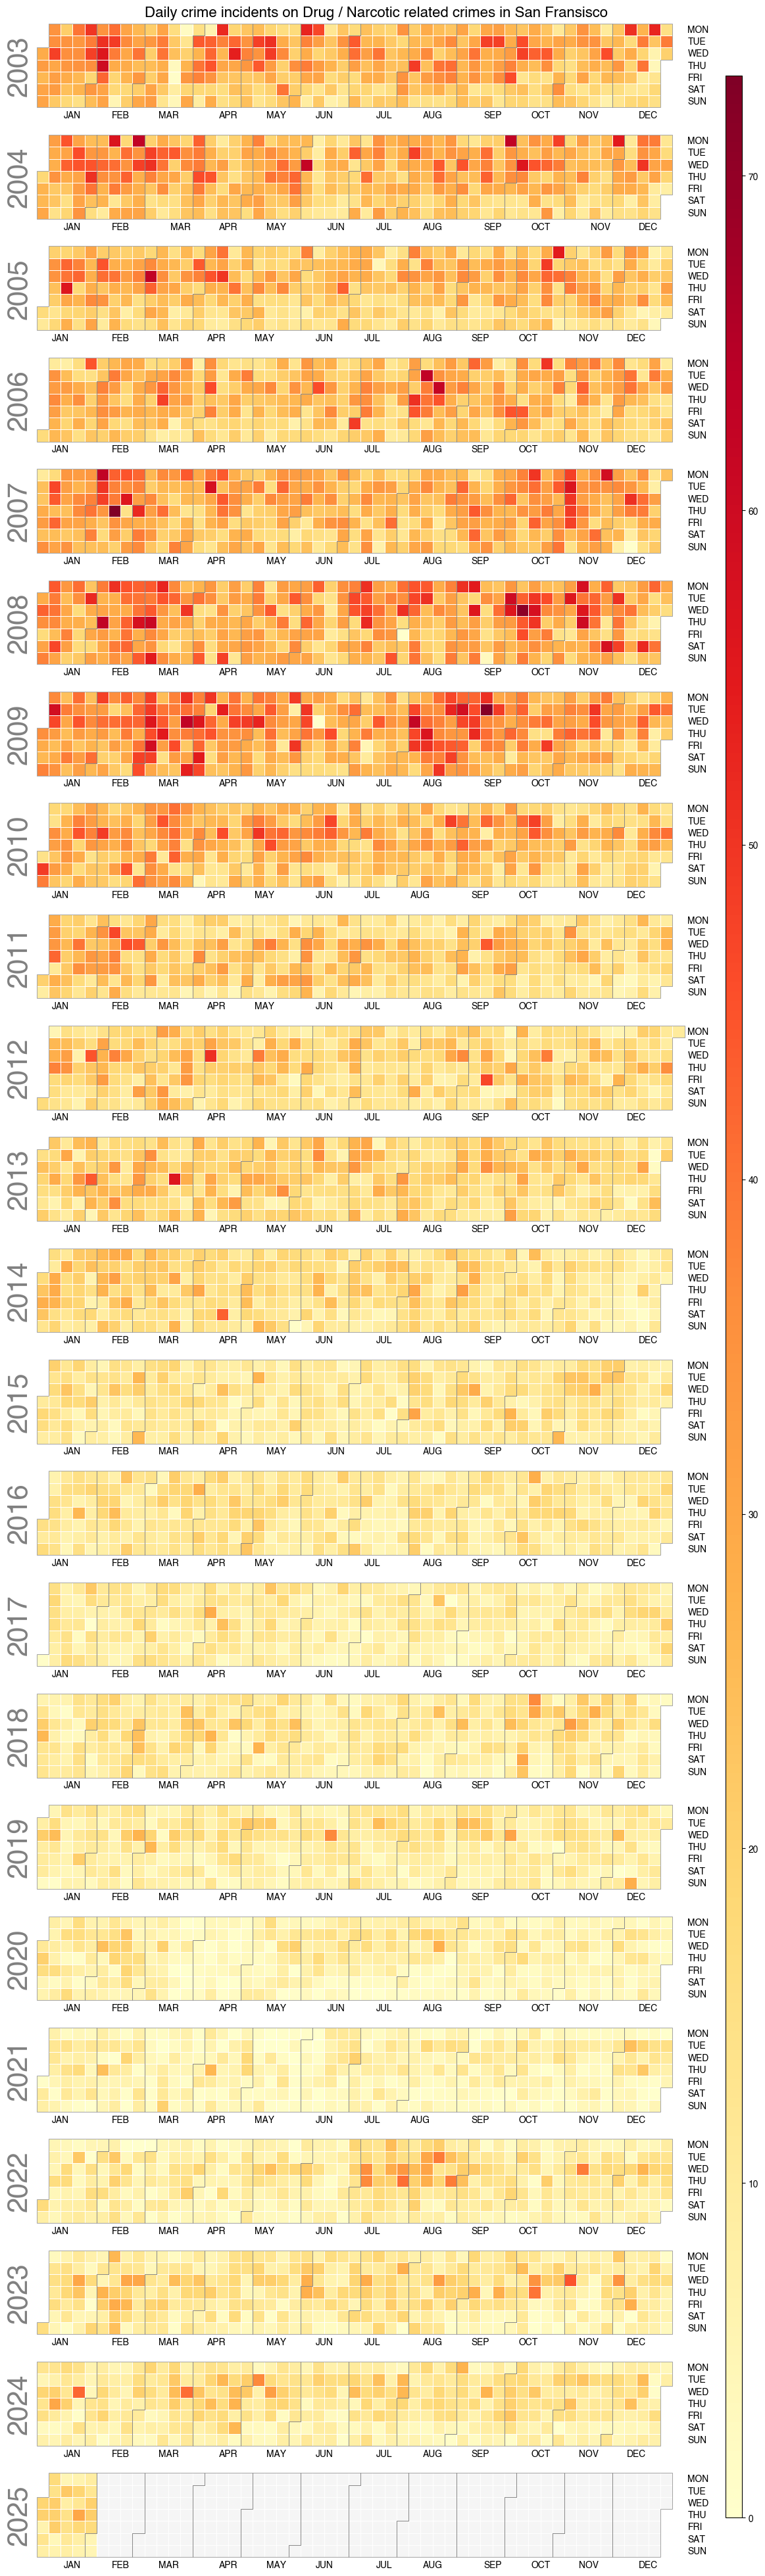

In [59]:
# Create the calendar plot
fig, ax = cp.calplot(
    daily_counts, 
    cmap="YlOrRd", 
    colorbar=True,
    linewidth=0.5,
    daylabels=["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"],
    monthlabels=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
    suptitle="Daily crime incidents on Drug / Narcotic related crimes in San Fransisco",
    suptitle_kws={'fontsize': 16, 'y': 1.002}
)
plt.show()

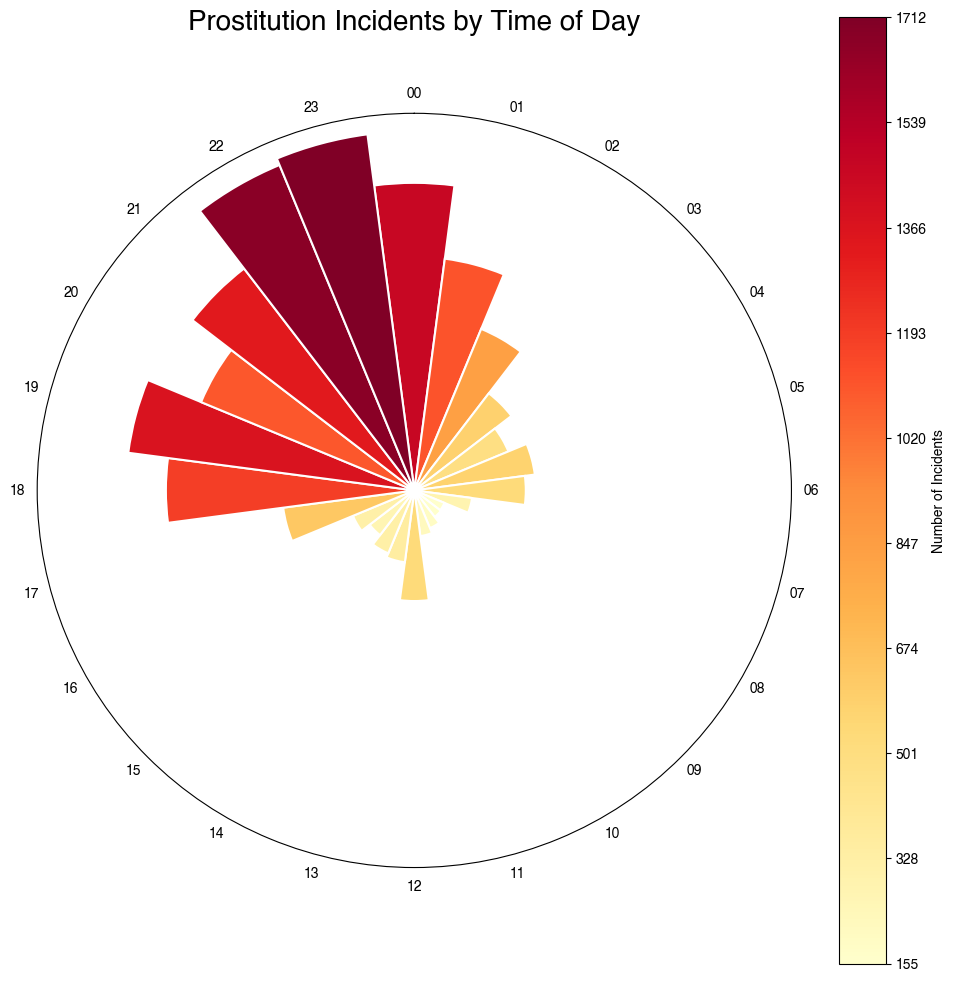

In [61]:
# Polar bar chart - using Prostitution

# filter by prostitution
df_prostitution = df[(df["Category"] == "PROSTITUTION")]

# group by time of day
df_hourly = df_prostitution.groupby("TimeOfDay").size()

# convert hours (0-23) into angles for a circular plot
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # 24 equal divisions

# Create the polar bar chart
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

ax.xaxis.grid(False)  # radial (spoke) lines
ax.yaxis.grid(False)  # circular lines
# Remove radial labels
ax.set_yticklabels([])

# Create the bars
bars = ax.bar(
    theta, 
    df_hourly, 
    width=2*np.pi/len(df_hourly), 
    bottom=0.5,
    linewidth=1.5,
    edgecolor="white")

# Set the direction to clockwise and start from the top
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2.0)

# # Set the labels
ax.set_xticks(theta)
ax.set_xticklabels([f"{int(hour):02d}" for hour in df_hourly.index])

# Color the bars according to count values
# Normalize the colors to the data range
norm = plt.Normalize(df_hourly.values.min(), df_hourly.values.max())
for bar, value in zip(bars, df_hourly.values):
    bar.set_facecolor(plt.cm.YlOrRd(norm(value)))

vmin = df_hourly.min()
vmax = df_hourly.max()

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
sm.set_array(df_hourly.values)  # Use the actual data values
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Number of Incidents')

# Ensure the colorbar ticks represent actual data values
cbar.set_ticks(np.linspace(vmin, vmax, 10))  # 5 ticks from min to max
cbar.set_ticklabels([int(val) for val in np.linspace(vmin, vmax, 10)])  # Format as integers


plt.title('Prostitution Incidents by Time of Day', y=1.1, fontsize=20)
plt.tight_layout()
plt.show()



## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


> *Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.
>
> <font color="grey"></font>
> 
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [76]:
df_prostitution = df[df["Category"] == "PROSTITUTION"]

In [77]:
# retrieve only prostitution category
df_prostitution = df[df["Category"] == "PROSTITUTION"]
date_range = pd.Series(pd.date_range("2011-03-01", "2011-07-31"))

# Filter the dataframe for the specified date range and time range
df_prostitution_filtered = df_prostitution[(df_prostitution['FullDate'].isin(date_range)) & 
                                           (df_prostitution['FullTime'].str[:2].astype(int) == 23)]

df_prostitution_filtered.sort_values(by='FullTime', inplace=True)

/var/folders/jf/0nvl5lz97m9gb6py4xb28b1c0000gn/T/ipykernel_72383/2060676601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prostitution_filtered.sort_values(by='FullTime', inplace=True)


/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='FullTime'>

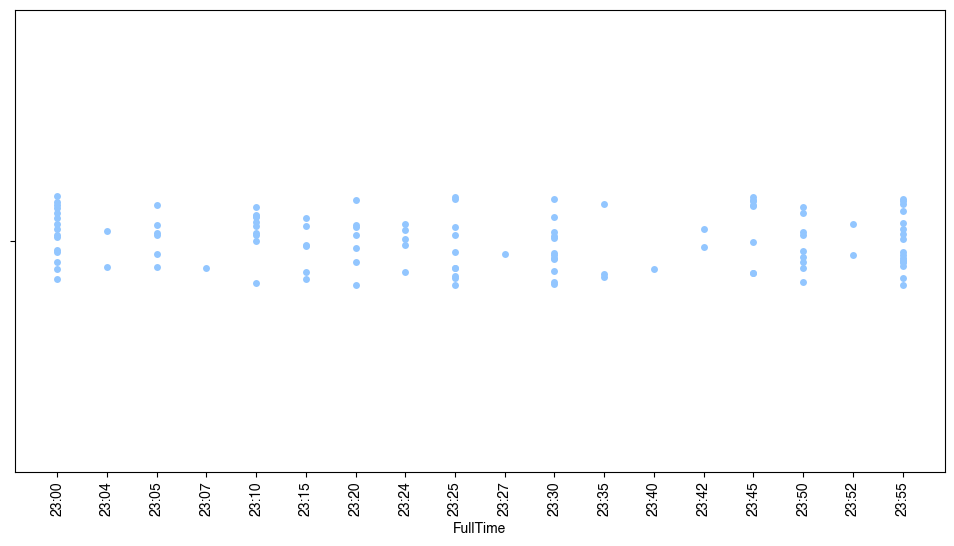

In [78]:

plt.figure(figsize=(12, 6))  # Set figure size
plt.tick_params(axis='x', labelrotation=90)
sns.stripplot(df_prostitution_filtered, x="FullTime")

# Comment on jitterplot

We can see that there are quite many incidents registered on the 23:00, 23:25, 23:30, 23:50 and 23:55. It indicates that the police officers might be a bit lazy when noting down the time, and that they are simply rounding up/down to a "nice" time slot. You can see that the time slots that are a bit more off, such as 23:04 and 23:27, do not contain a lot of entries.

> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 
>
> Let's take a break. Get some coffee or water. Stretch your legs. Talk to your friends for a bit. Breathe. Get relaxed so you're ready for the second part of the exercise. 


In [90]:
# prostitution and vehicle theft 

# Richmond - drug/narcotic
# Mission - prostitution
# we want Y
crimes = ["PROSTITUTION", "DRUG/NARCOTIC"]
df_twocrimes = df[df["Category"].isin(crimes)]
date_range = pd.Series(pd.date_range("2011-03-01", "2011-09-30"))

df_filtered = df_twocrimes[df_twocrimes["FullDate"].isin(date_range)]
df_filtered

,FullDate,FullTime,Category,PdDistrict,Longitude,Latitude,TimeOfDay,DayOfWeek,DayOfMonth,Month,Year
515,2011-03-24,18:29,DRUG/NARCOTIC,TENDERLOIN,-122.414218,37.783259,18,Thursday,24,March,2011
552,2011-06-15,21:42,DRUG/NARCOTIC,SOUTHERN,-122.415444,37.778025,21,Wednesday,15,June,2011
694,2011-09-27,09:55,DRUG/NARCOTIC,MISSION,-122.419672,37.765050,9,Tuesday,27,September,2011
1000,2011-04-02,18:16,DRUG/NARCOTIC,NORTHERN,-122.432444,37.773293,18,Saturday,2,April,2011
1255,2011-03-12,01:55,PROSTITUTION,MISSION,-122.417964,37.758697,1,Saturday,12,March,2011
...,...,...,...,...,...,...,...,...,...,...,...
1108339,2011-06-08,10:59,DRUG/NARCOTIC,TENDERLOIN,-122.412994,37.785563,10,Wednesday,8,June,2011
1109262,2011-03-05,21:02,DRUG/NARCOTIC,SOUTHERN,-122.409537,37.782691,21,Saturday,5,March,2011
1109354,2011-05-19,04:20,PROSTITUTION,NORTHERN,-122.422696,37.792173,4,Thursday,19,May,2011
1109381,2011-07-06,14:40,DRUG/NARCOTIC,SOUTHERN,-122.407877,37.780388,14,Wednesday,6,July,2011


/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


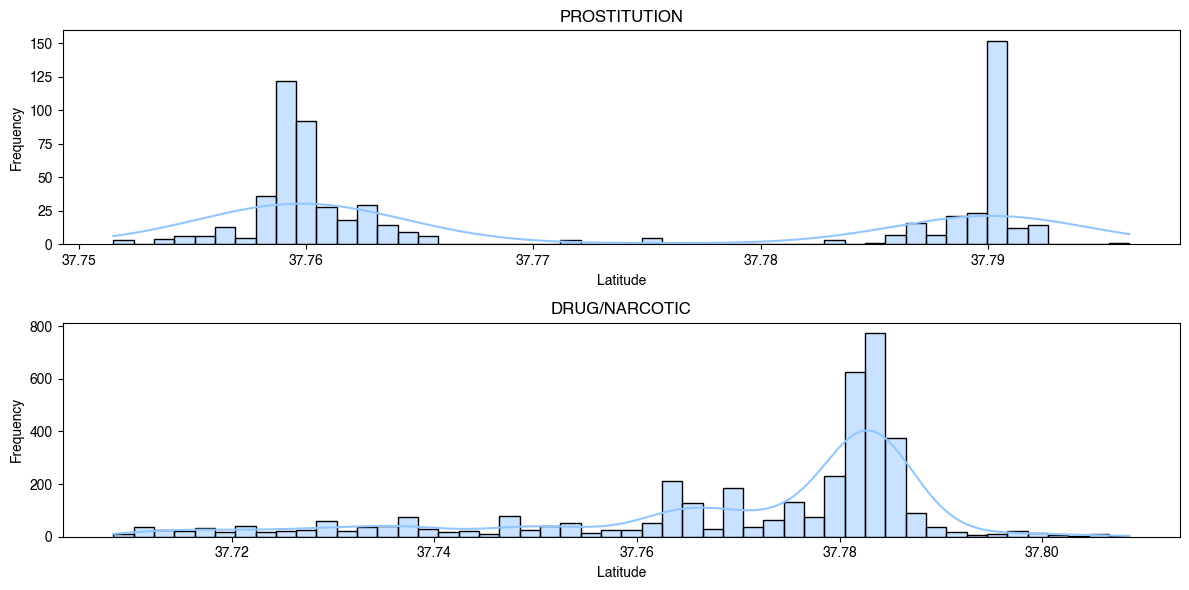

In [91]:
# Create histogram with 50 bins
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

for i, crime in enumerate(crimes):
    df_crime = df_filtered[df_filtered["Category"] == crime]
    sns.histplot(df_crime['Latitude'], bins=50, ax=ax[i], kde=True) # setting kde to true in order to apply the gaussian kernel to the dataset and plot it with the histogram
    ax[i].set_title(f'{crime}')
    ax[i].set_xlabel('Latitude')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



> 
> *Excercise Part 2*:
>
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function. 

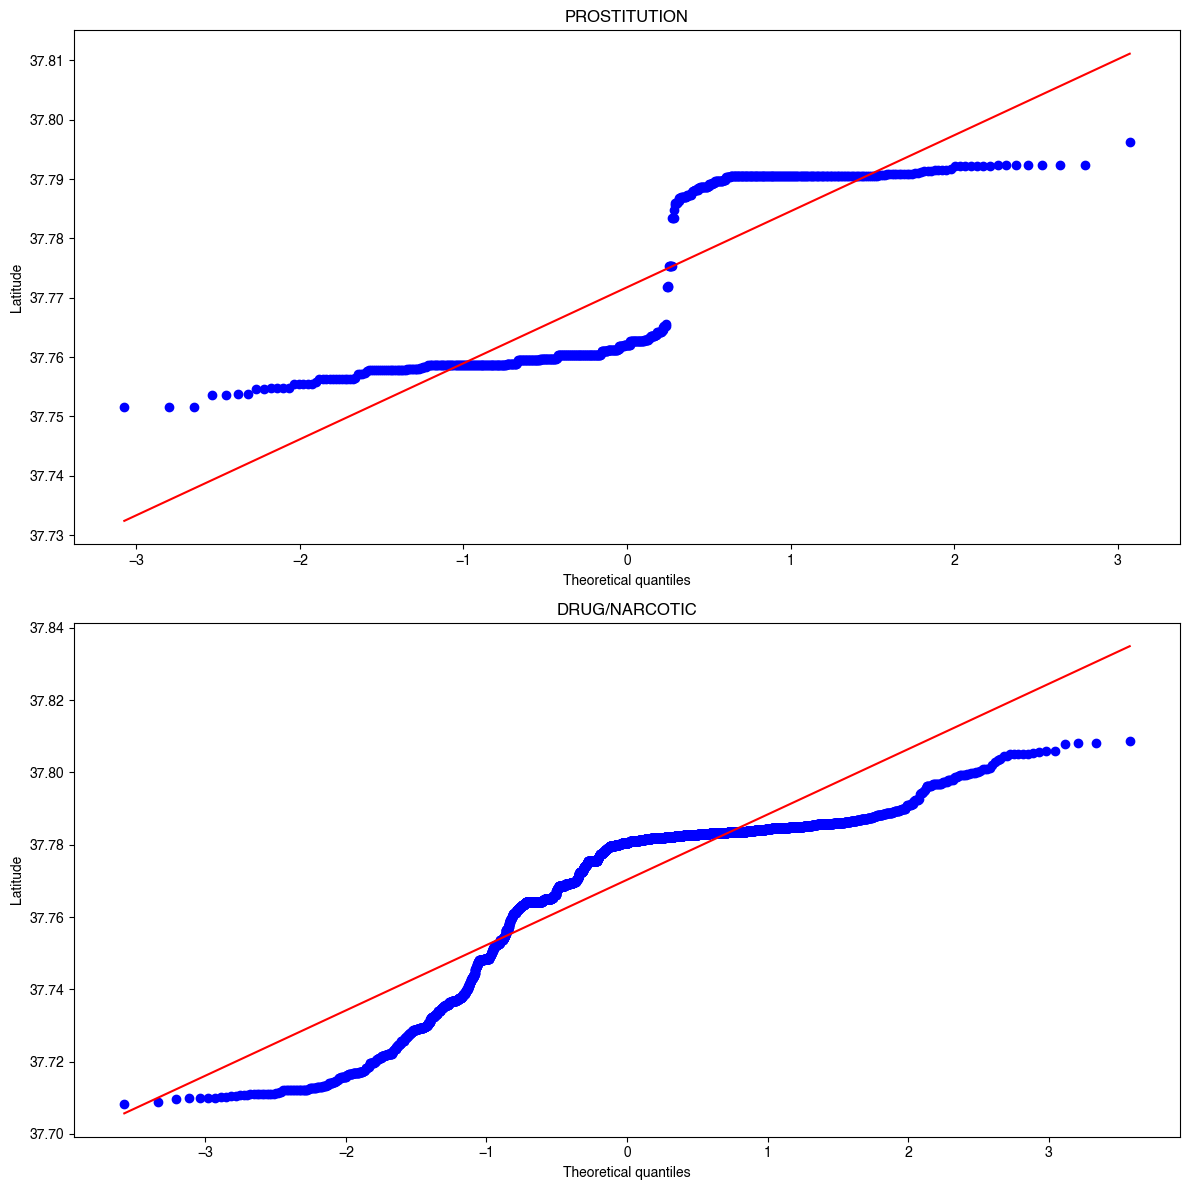

In [93]:
# Create probplots with 50 bins
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

for i, crime in enumerate(crimes):
    df_crime = df_filtered[df_filtered["Category"] == crime]
    stats.probplot(df_crime['Latitude'], plot=ax[i])
    ax[i].set_title(f'{crime}')
    ax[i].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# Comments

The two crimers picked are prostitution and drug/narcotics. 

Prostituion is not a normally distributed crime, and we can see that it is more frequent in latitude 37.75 and 37.79 which corresponds to the Mission and Northern area.
These two areas are the ones with the most filed police reports within prostitution.

The latter crime, drug/narcotics, is more frequent in latitude 37.71 and 37.78 which corresponds to the ??? area.

> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 10 focus crimes defined previously.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all the 10 different focus crimes side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). <font color="gray">It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!</font>.
>   * What does this plot reveal that you can't see in the plots from last time?

In [96]:
# calculate number of crimes per day within each category
df_daily_grouped = df.groupby(["DayOfWeek", "Category"]).size().unstack()

/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

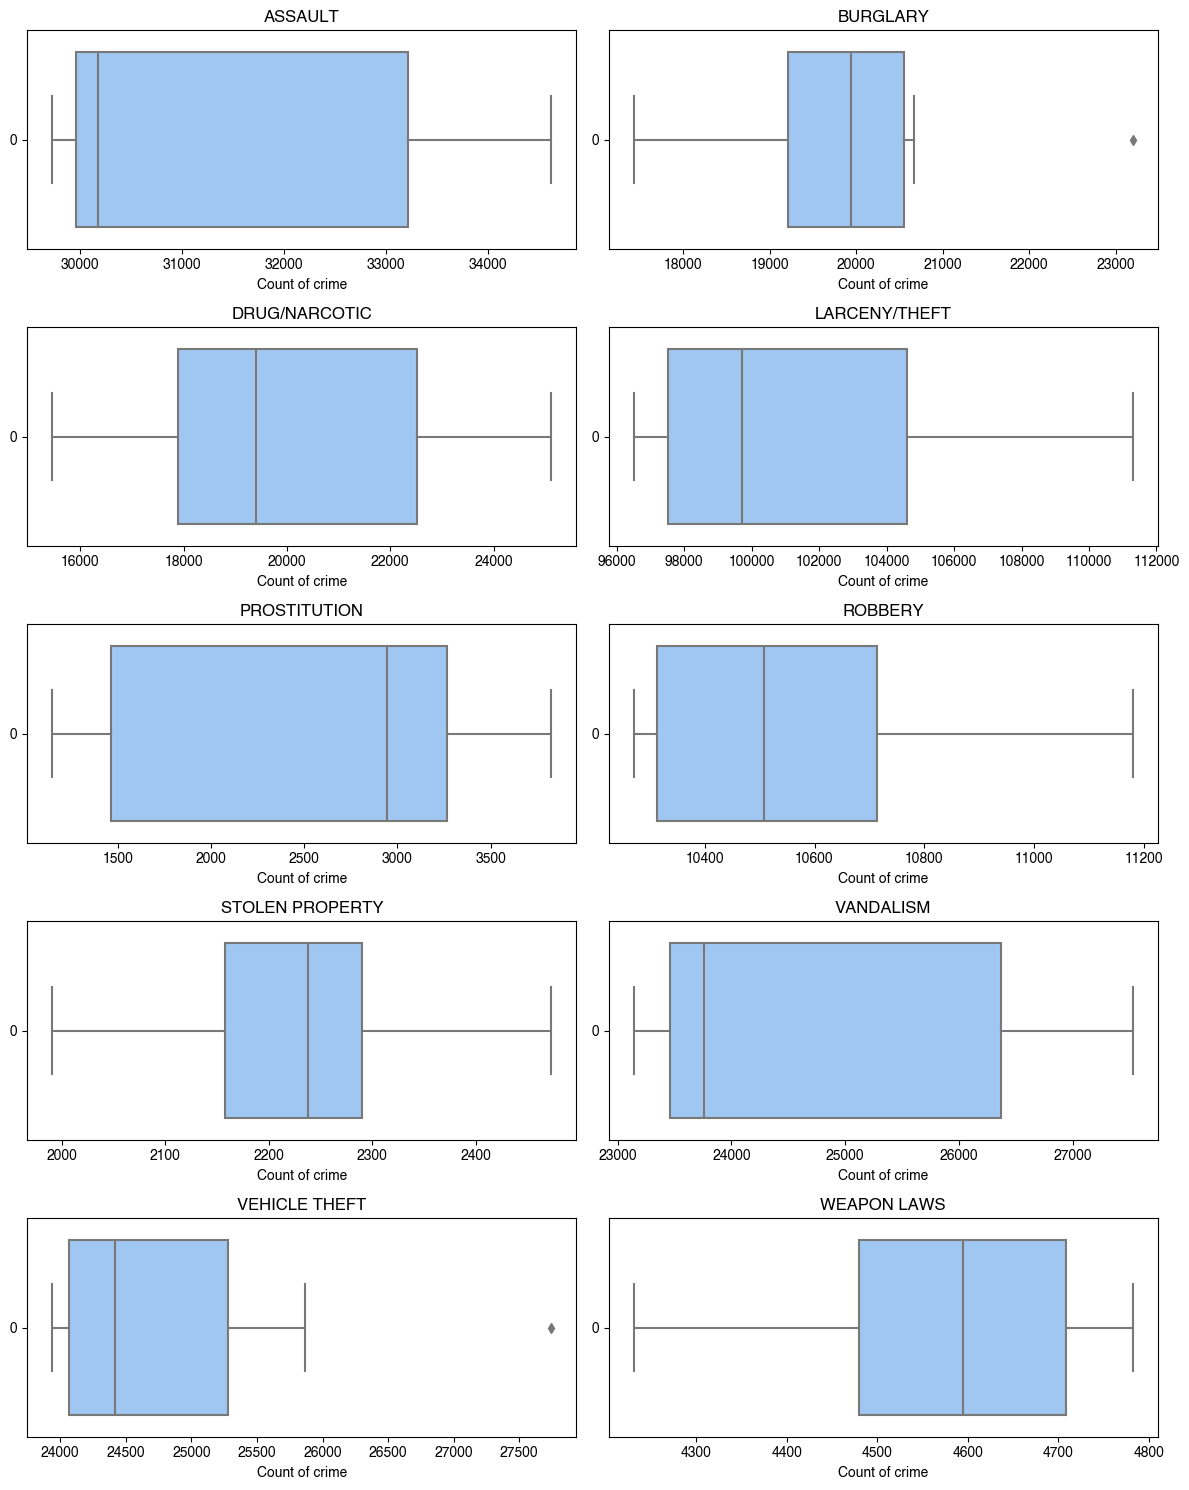

In [98]:
# creating boxplots for each category in subplots
fig, ax = plt.subplots(5, 2, figsize=(12, 15))
ax = ax.flatten()

for i, crime in enumerate(df_daily_grouped):
    ax[i].set_title(f"{crime}")
    ax[i].set_xlabel("Count of crime")

    sns.boxplot(data=df_daily_grouped[crime], orient='h', ax=ax[i])

plt.tight_layout()
plt.show()


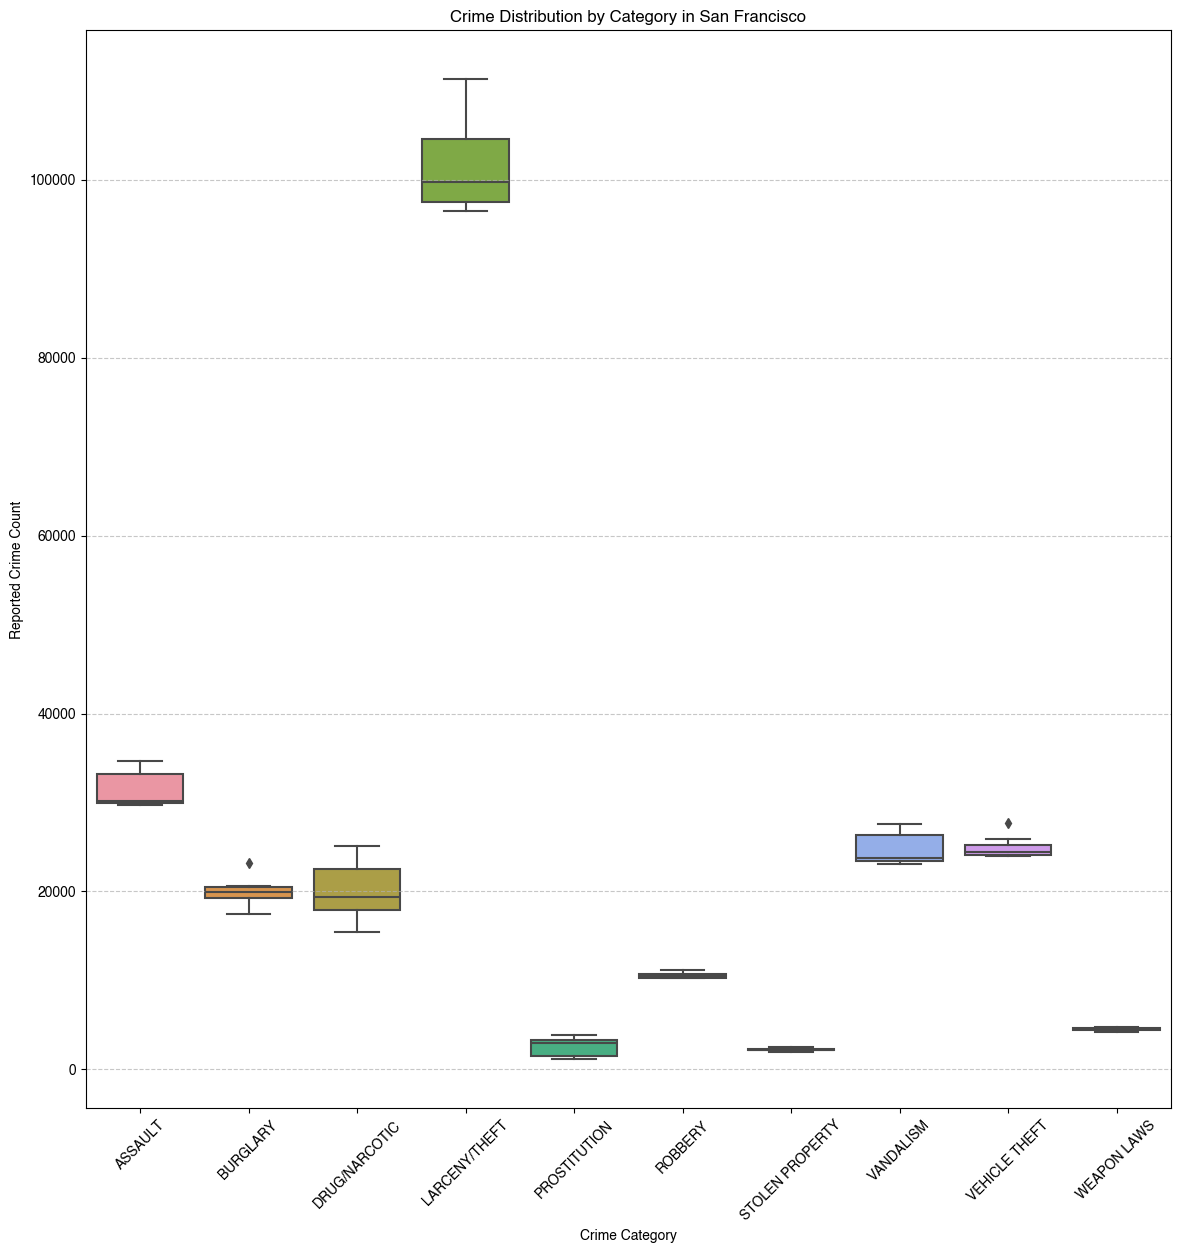

In [100]:
# creating a single boxplot with all the subcrimes

# Set figure size
plt.figure(figsize=(14, 14))

# Create the boxplot
sns.boxplot(data=df_daily_grouped)

# Improve readability
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.title("Crime Distribution by Category in San Francisco")
plt.xlabel("Crime Category")
plt.ylabel("Reported Crime Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


# Notes

Please note that I skipped this part

> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 